# Salted 인솔 데이터 전처리

## 센서 데이터 추출 및 걸음 단위 분할

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import scipy
from scipy.ndimage import gaussian_filter1d

import os 
import glob

In [14]:
glob.glob("D:\gait_dataset/salted/*")

['D:\\gait_dataset/salted\\김보민_220617_3km.csv',
 'D:\\gait_dataset/salted\\김보민_220617_4km.csv',
 'D:\\gait_dataset/salted\\김보민_220617_5km.csv',
 'D:\\gait_dataset/salted\\민재은_220613_3km.csv',
 'D:\\gait_dataset/salted\\민재은_220613_4km.csv',
 'D:\\gait_dataset/salted\\민재은_220613_5km.csv',
 'D:\\gait_dataset/salted\\신수종_220610_3km.csv',
 'D:\\gait_dataset/salted\\신수종_220610_4km.csv',
 'D:\\gait_dataset/salted\\신수종_220610_5km.csv',
 'D:\\gait_dataset/salted\\왕준기_220608_3km.csv',
 'D:\\gait_dataset/salted\\왕준기_220609_4km.csv',
 'D:\\gait_dataset/salted\\왕준기_220609_5km.csv',
 'D:\\gait_dataset/salted\\이정호_220617_3km.csv',
 'D:\\gait_dataset/salted\\이정호_220617_4km.csv',
 'D:\\gait_dataset/salted\\이정호_220617_5km.csv',
 'D:\\gait_dataset/salted\\최영찬_220609_3km.csv',
 'D:\\gait_dataset/salted\\최영찬_220609_4km.csv',
 'D:\\gait_dataset/salted\\최영찬_220609_5km.csv',
 'D:\\gait_dataset/salted\\최창환_220610_3km.csv',
 'D:\\gait_dataset/salted\\최창환_220610_4km.csv',
 'D:\\gait_dataset/salted\\최창환_220610_5k

In [15]:
df = pd.read_csv('D:\gait_dataset/salted/이정호_220617_3km.csv', skiprows=2)
df

,date,timestamp,L_value1,L_value2,L_value3,L_value4,R_value1,R_value2,R_value3,R_value4,...,R_value5_raw,R_value6_raw,L_GYRO_X,L_GYRO_Y,L_GYRO_Z,R_GYRO_X,R_GYRO_Y,R_GYRO_Z,L_TEMPERATURE,R_TEMPERATURE
0,Fri Jun 17 15:27:23 GMT+09:00 2022,19860,0,0,4,100,0,0,0,0,...,0,0,-27,26,-17,2398,-584,-873,-10950,4000
1,Fri Jun 17 15:27:23 GMT+09:00 2022,19870,0,0,5,100,0,0,0,0,...,0,0,-25,32,-17,2475,-607,-822,-11050,3950
2,Fri Jun 17 15:27:23 GMT+09:00 2022,19880,0,0,6,100,0,0,0,0,...,0,0,-27,23,-18,2521,-649,-729,-11200,4100
3,Fri Jun 17 15:27:23 GMT+09:00 2022,19890,0,0,6,100,0,0,0,0,...,0,0,-22,26,-13,2545,-708,-612,-10950,4050
4,Fri Jun 17 15:27:23 GMT+09:00 2022,19900,0,0,7,100,0,0,0,0,...,0,0,-27,8,-16,2534,-766,-493,-10850,4200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18527,Fri Jun 17 15:30:28 GMT+09:00 2022,205130,0,0,0,0,55,5,67,32,...,0,0,2529,992,1876,-127,-88,25,-2800,13650
18528,Fri Jun 17 15:30:28 GMT+09:00 2022,205140,0,0,0,0,57,6,69,28,...,0,0,2258,732,1763,-142,-102,29,-2750,13500
18529,Fri Jun 17 15:30:28 GMT+09:00 2022,205150,0,0,0,0,60,7,70,24,...,0,0,1981,220,1631,-160,-127,26,-2550,13300
18530,Fri Jun 17 15:30:28 GMT+09:00 2022,205160,0,0,0,0,62,8,72,20,...,0,0,1787,-349,1405,-184,-141,36,-2700,13650


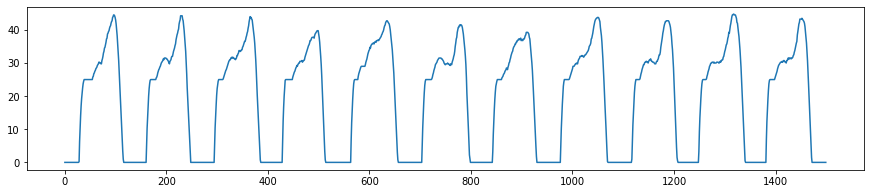

In [16]:
# 오른쪽 압력값 평균

# right_prs = df.filter(regex="raw$")
# right_pres_mean = np.mean(right_prs.iloc[:, 4:8], axis=1) 

right_prs = df.filter(regex="R_value") # R_value의 값은 압력 센서의 raw값이 아닌 백분율
right_pres_mean = np.mean(right_prs.iloc[:, 0:4], axis=1) 
plt.figure(figsize=(15,3))
plt.plot(right_pres_mean[0:1500])

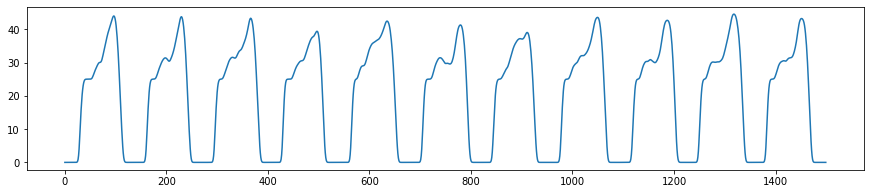

In [17]:
# 노이즈 제거를 위해 가우시안 필터 적용
right_pres_mean_gf = pd.Series(scipy.ndimage.gaussian_filter1d(right_pres_mean, 2))
plt.figure(figsize=(15,3))
plt.plot(right_pres_mean_gf[0:1500])

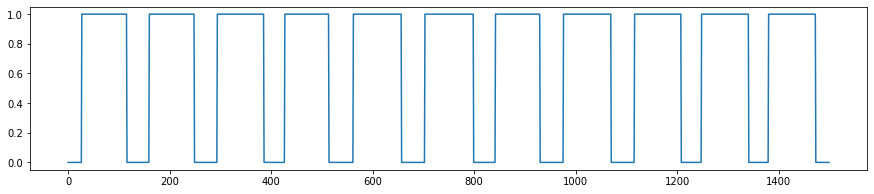

In [18]:
# 최종적으로 처리된 압력값을 바이너리로 표현
lev_idx = right_pres_mean_gf > 2 # 가우시안 필터로 인해 0이 아닌 값으로 threshold 설정
right_pres_lev = lev_idx.map(lambda x : 1 if x else 0)
plt.figure(figsize=(15,3))
plt.plot(right_pres_lev[:1500])

In [19]:
# 이벤트(HS, TO)에 대한 인덱스 추출
event_idx = []
for i in range(len(right_pres_lev)-1):
    if (right_pres_lev[i] - right_pres_lev[i+1]) != 0:
        event_idx.append(i)
event_idx

[26,
 115,
 159,
 248,
 293,
 385,
 426,
 513,
 561,
 656,
 702,
 798,
 841,
 929,
 975,
 1069,
 1115,
 1207,
 1247,
 1340,
 1379,
 1472,
 1514,
 1610,
 1652,
 1746,
 1795,
 1887,
 1928,
 2021,
 2067,
 2159,
 2205,
 2299,
 2341,
 2437,
 2482,
 2573,
 2616,
 2711,
 2756,
 2854,
 2900,
 2995,
 3036,
 3128,
 3170,
 3267,
 3316,
 3410,
 3460,
 3550,
 3596,
 3689,
 3733,
 3827,
 3871,
 3967,
 4012,
 4109,
 4153,
 4247,
 4295,
 4387,
 4441,
 4535,
 4583,
 4673,
 4722,
 4817,
 4862,
 4957,
 5002,
 5098,
 5144,
 5236,
 5281,
 5377,
 5421,
 5518,
 5562,
 5657,
 5706,
 5796,
 5847,
 5939,
 5986,
 6078,
 6126,
 6219,
 6267,
 6361,
 6408,
 6507,
 6556,
 6641,
 6688,
 6785,
 6831,
 6927,
 6971,
 7069,
 7109,
 7208,
 7250,
 7344,
 7392,
 7483,
 7529,
 7622,
 7666,
 7763,
 7810,
 7907,
 7950,
 8043,
 8088,
 8185,
 8226,
 8320,
 8367,
 8458,
 8504,
 8597,
 8647,
 8743,
 8788,
 8888,
 8929,
 9022,
 9065,
 9166,
 9211,
 9305,
 9356,
 9454,
 9497,
 9589,
 9637,
 9732,
 9782,
 9881,
 9928,
 10019,
 10068,

In [20]:
# 일반적으로 Stance가 Swing보다 길다는 사실을 이용하여 첫 이벤트가 HS가 되도록 설정
# HS만 추출하여 단위걸음 분할

if np.diff(event_idx)[0] < np.diff(event_idx)[1]: # 장애 데이터에서도 확인 필요
    del event_idx[0]
event_hs = event_idx[0::2]
event_hs

[26,
 159,
 293,
 426,
 561,
 702,
 841,
 975,
 1115,
 1247,
 1379,
 1514,
 1652,
 1795,
 1928,
 2067,
 2205,
 2341,
 2482,
 2616,
 2756,
 2900,
 3036,
 3170,
 3316,
 3460,
 3596,
 3733,
 3871,
 4012,
 4153,
 4295,
 4441,
 4583,
 4722,
 4862,
 5002,
 5144,
 5281,
 5421,
 5562,
 5706,
 5847,
 5986,
 6126,
 6267,
 6408,
 6556,
 6688,
 6831,
 6971,
 7109,
 7250,
 7392,
 7529,
 7666,
 7810,
 7950,
 8088,
 8226,
 8367,
 8504,
 8647,
 8788,
 8929,
 9065,
 9211,
 9356,
 9497,
 9637,
 9782,
 9928,
 10068,
 10206,
 10349,
 10487,
 10626,
 10755,
 10883,
 11016,
 11152,
 11288,
 11425,
 11564,
 11704,
 11842,
 11983,
 12116,
 12252,
 12396,
 12536,
 12667,
 12804,
 12956,
 13087,
 13227,
 13369,
 13514,
 13651,
 13801,
 13939,
 14083,
 14217,
 14360,
 14509,
 14658,
 14800,
 14941,
 15079,
 15223,
 15364,
 15506,
 15652,
 15800,
 15935,
 16072,
 16212,
 16348,
 16489,
 16623,
 16782,
 16919,
 17064,
 17204,
 17344,
 17486,
 17626,
 17772,
 17911,
 18050,
 18190,
 18331,
 18468]

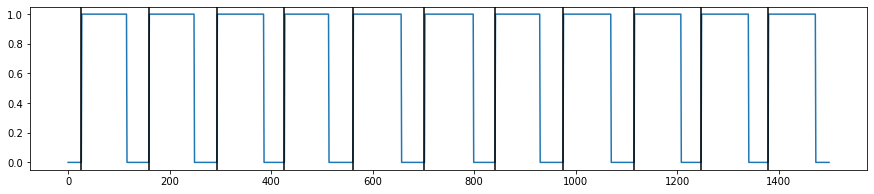

In [21]:
# HS를 기준으로 잘 잘렸는지 확인
plt.figure(figsize=(15,3))
plt.plot(right_pres_lev[:1500])
for i in range(len(event_hs)):
    if event_hs[i] < 1500 :
        plt.axvline(x=event_hs[i], color='k')

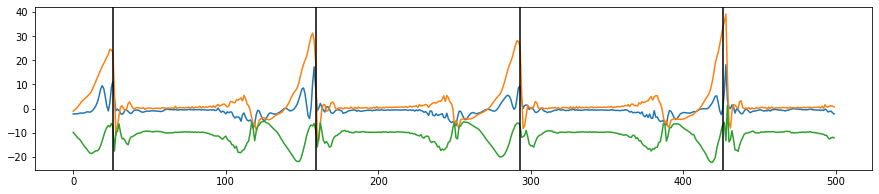

In [22]:
# HS 이벤트를 기준으로 가속도 확인

# m/s^2 변환
acc_x = (df.R_ACC_X / 1000) * 9.8066
acc_y = (df.R_ACC_Y / 1000) * 9.8066
acc_z = (df.R_ACC_Z / 1000) * 9.8066
# acc_z = acc_z + 9.8066
# acc_z = acc_z - np.mean(acc_z) # z축(상하)에 적용되는 중력가속도 제거 : 추가확인 필요


plt.figure(figsize=(15,3))
plt.plot(acc_x[:500])
plt.plot(acc_y[:500])
plt.plot(acc_z[:500])
for i in range(len(event_hs)):
    if event_hs[i] < 500 :
        plt.axvline(x=event_hs[i], color='k')

## 적분으로 속도 및 위치 추출

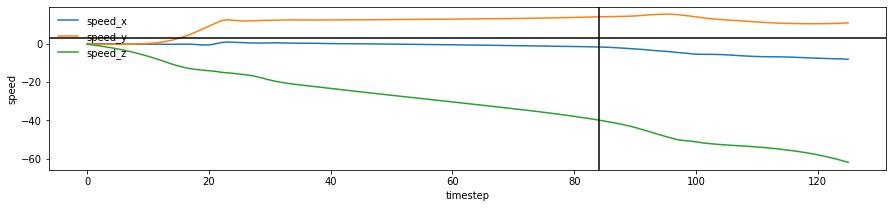

In [12]:
# 속도 : 각 축별로 가속도를 적분, z축에 대해서는 중력가속도를 제거
speed_x = []
speed_y = []
speed_z = []
sp_x = 0
sp_y = 0
sp_z = 0

for i in range(76, 202):
    vel_x = sp_x + 0.5*(acc_x[i] + acc_x[i+1])*(1/100)    
    sp_x =+ vel_x
    speed_x.append(sp_x)
    
    vel_y = sp_y + 0.5*(acc_y[i] + acc_y[i+1])*(1/100)    
    sp_y =+ vel_y
    speed_y.append(sp_y)
    
    vel_z = sp_z + 0.5*(acc_z[i] + acc_z[i+1])*(1/100)    
    sp_z =+ vel_z
    speed_z.append(sp_z)
    
plt.figure(figsize=(15,3))
plt.plot(np.array(speed_x)*3.6)
plt.plot(np.array(speed_y)*3.6)
plt.plot(np.array(speed_z)*3.6)
plt.legend(labels=['speed_x', 'speed_y', 'speed_z'], loc='upper left', frameon=False)
plt.axhline(y=3, color='k') # 3km/h
plt.axvline(x=84, color='k') # TO event
plt.xlabel('timestep')
plt.ylabel('speed')
plt.show()

Text(0, 0.5, 'distance')

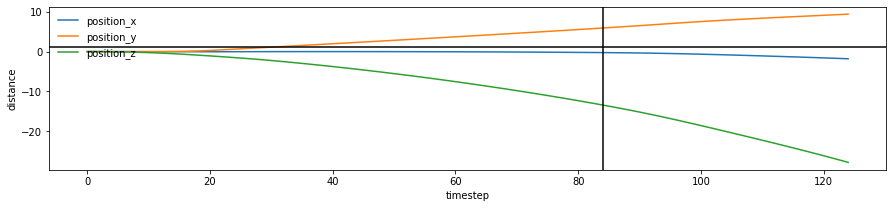

In [13]:
# 위치 : 각 축별로 속도를 적분
position_x = []
position_y = []
position_z = []
pst_x = 0
pst_y = 0
pst_z = 0

for i in range(len(speed_x)-1):
    pos_accu_x = pst_x + 0.5*(speed_x[i] +speed_x[i+1])*(1/40)    
    pst_x =+ pos_accu_x
    position_x.append(pst_x)
    
    pos_accu_y = pst_y + 0.5*(speed_y[i] +speed_y[i+1])*(1/40)    
    pst_y =+ pos_accu_y
    position_y.append(pst_y)
    
    pos_accu_z = pst_z + 0.5*(speed_z[i] +speed_z[i+1])*(1/40)
    pst_z =+ pos_accu_z
    position_z.append(pst_z)
    
plt.figure(figsize=(15,3))
plt.plot(position_x)
plt.plot(position_y)
plt.plot(position_z)
plt.legend(labels=['position_x', 'position_y', 'position_z'], loc='upper left', frameon=False)
plt.axhline(y=1.05, color='k') # 압력센서로 구한 해당 구간 stride length
plt.axvline(x=84, color='k') # TO event
plt.xlabel('timestep')
plt.ylabel('distance')

## 분산에 따른 SL 확인

In [128]:
# 구한 HS 이벤트를 활용하여 각 걸음의 Stride Length 추출
stride_length_5kmdf = np.round(np.diff(event_hs) * (5000/3600), 3)
print(stride_length_5kmdf)

[159.722 151.389 152.778 151.389 152.778 151.389 151.389 151.389 151.389
 150.    152.778 152.778 148.611 154.167 155.556 154.167 156.944 155.556
 154.167 151.389 154.167 154.167 154.167 154.167 154.167 155.556 154.167
 152.778 154.167 155.556 162.5   152.778 156.944 154.167 158.333 155.556
 154.167 151.389 152.778 154.167 154.167 152.778 151.389 156.944 162.5
 151.389 154.167 154.167 155.556 152.778 151.389 156.944 152.778 158.333
 151.389 154.167 154.167 159.722 154.167 151.389 155.556 155.556 155.556
 152.778 156.944 154.167 155.556 154.167 154.167 155.556 154.167 156.944
 152.778 150.    154.167 152.778 156.944 156.944 155.556 154.167 155.556
 154.167 152.778 151.389 152.778 152.778 152.778 152.778 154.167 154.167
 151.389 154.167 154.167 152.778 154.167 154.167 152.778 150.    154.167
 154.167 154.167 151.389 152.778 150.    154.167 155.556 151.389 151.389
 152.778 154.167 151.389 151.389 156.944 150.    151.389 154.167 155.556
 156.944 155.556 154.167 154.167 154.167 154.167 154.

In [98]:
# 각 걸음당 가속도 센서의 분산
acc_x_var_5km = []
acc_y_var_5km = []
acc_z_var_5km = []
for i in range(0, len(event_hs)-1):
    var_x = np.var(acc_x[event_hs[i]:event_hs[i+1]])
    var_y = np.var(acc_y[event_hs[i]:event_hs[i+1]])
    var_z = np.var(acc_z[event_hs[i]:event_hs[i+1]])
    acc_x_var_5km.append(var_x)
    acc_y_var_5km.append(var_y)
    acc_z_var_5km.append(var_z)

In [107]:
acc_x_var = np.hstack([acc_x_var_3km, acc_x_var_4km, acc_x_var_5km])
acc_y_var = np.hstack([acc_y_var_3km, acc_y_var_4km, acc_y_var_5km])
acc_z_var = np.hstack([acc_z_var_3km, acc_z_var_4km, acc_z_var_5km])
stride_length = np.hstack([stride_length_3km, stride_length_4km, stride_length_5km])

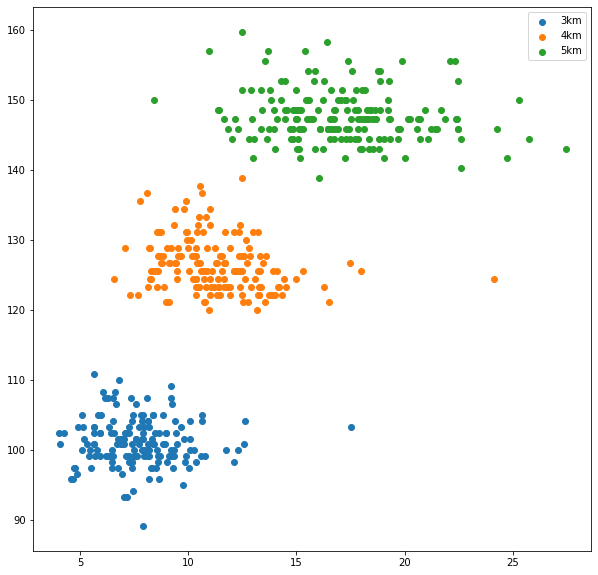

In [115]:
plt.figure(figsize=(10, 10))
plt.scatter(acc_x_var_3km, stride_length_3km, label="3km")
plt.scatter(acc_x_var_4km, stride_length_4km, label="4km")
plt.scatter(acc_x_var_5km, stride_length_5km, label="5km")
plt.legend()

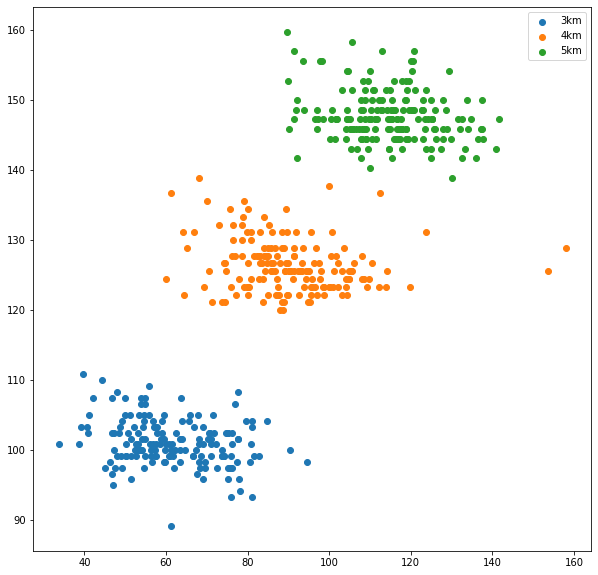

In [118]:
plt.figure(figsize=(10, 10))
plt.scatter(acc_y_var_3km, stride_length_3km, label="3km")
plt.scatter(acc_y_var_4km, stride_length_4km, label="4km")
plt.scatter(acc_y_var_5km, stride_length_5km, label="5km")
plt.legend()

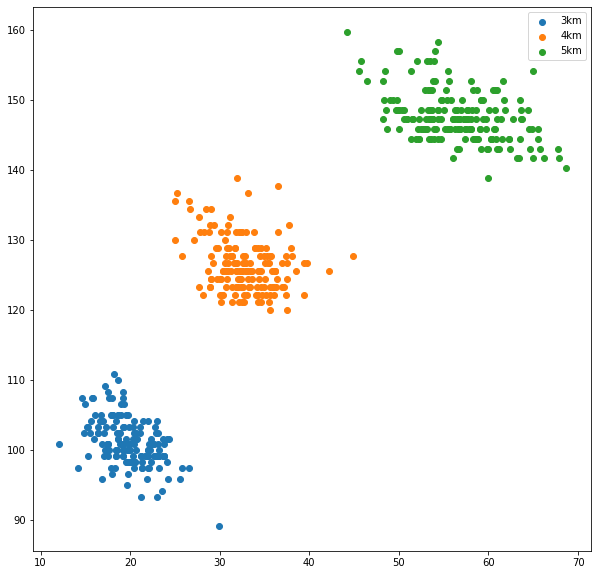

In [116]:
plt.figure(figsize=(10, 10))
plt.scatter(acc_z_var_3km, stride_length_3km, label="3km")
plt.scatter(acc_z_var_4km, stride_length_4km, label="4km")
plt.scatter(acc_z_var_5km, stride_length_5km, label="5km")
plt.legend()

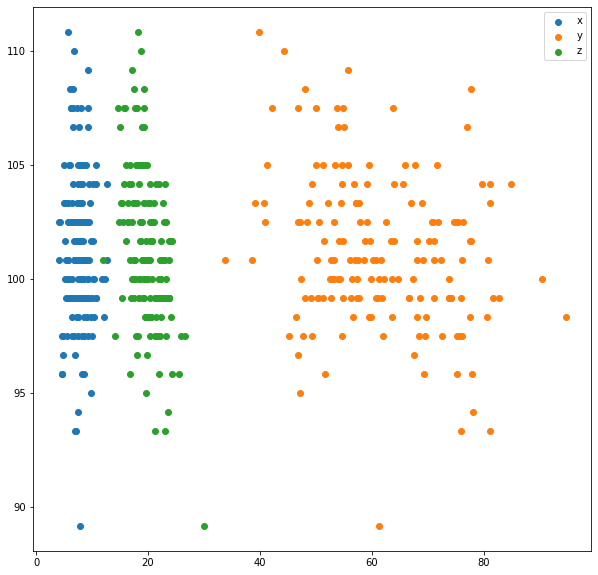

In [119]:
plt.figure(figsize=(10, 10))
plt.scatter(acc_x_var_3km, stride_length_3km, label="x")
plt.scatter(acc_y_var_3km, stride_length_3km, label="y")
plt.scatter(acc_z_var_3km, stride_length_3km, label="z")
plt.legend()